In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import metrics
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

**EDA**

---



In [8]:
df_genres = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/genres_v2.csv')
# df_genres = pd.read_csv('/content/gdrive/My Drive/W207 Final Project/genres_v2.csv') #changed the pathway to our shared folder

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
df_genres

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42301         0.517   0.768    0    -7.922     0       0.0479      0.022500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence  ...                      id  \
0              0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1              0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2              0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3              0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4              0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   
...                 ...       ...      ...  ...                     ...   
42300          0.000345    0.1210   0.3940  ...  46bXU7Sgj7104ZoXxzz9tM   
42301          0.000018    0.2050   0.3830  ...  0he2ViGMUO3ajKTxLOfWVT   
42302          0.000242    0.3850   0.1240  ...  72DAt9Lbpy9EUS29OzQLob   
42303          0.029600    0.0575   0.4880  ...  6HXgExFVuE1c3cq9QjFCcU   
42304          0.000055    0.4140   0.1340  ...  6MAAMZImxcvYhRnxDLTufD   

                                        uri  \
0      spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1      spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2      spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3      spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4      spotify:track:4jCeguq9rMTlbMmPHuO7S3   
...                                     ...   
42300  spotify:track:46bXU7Sgj7104ZoXxzz9tM   
42301  spotify:track:0he2ViGMUO3ajKTxLOfWVT   
42302  spotify:track:72DAt9Lbpy9EUS29OzQLob   
42303  spotify:track:6HXgExFVuE1c3cq9QjFCcU   
42304  spotify:track:6MAAMZImxcvYhRnxDLTufD   

                                              track_href  \
0      https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1      https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2      https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3      https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4      https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   
...                                                  ...   
42300  https://api.spotify.com/v1/tracks/46bXU7Sgj710...   
42301  https://api.spotify.com/v1/tracks/0he2ViGMUO3a...   
42302  https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...   
42303  https://api.spotify.com/v1/tracks/6HXgExFVuE1c...   
42304  https://api.spotify.com/v1/tracks/6MAAMZImxcvY...   

                                            analysis_url duration_ms  \
0      https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1      https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2      https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3      https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4      https://api.spotify.com/v1/audio-analysis/4jCe...      123298   
...                                                  ...         ...   
42300  https://api.spotify.com/v1/audio-analysis/46bX...      269208   
42301  https://api.spotify.com/v1/audio-analysis/0he2...      210112   
42302  https://api.spotify.com/v1/audio-analysis/72DA...      234823   
42303  https://api.spotify.com/v1/audio-analysis/6HXg...      323200   
42304  https://api.spotify.com/v1/audio-analysis/6MAA...      162161   

      

In [10]:
df_genres.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [11]:
df_genres["type"].value_counts(dropna=False)

audio_features    42305
Name: type, dtype: int64

In [14]:
# df_playlist = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/playlists.csv')
df_playlist = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/W207 Final Project/playlists.csv')

In [15]:
df_playlist

Playlist            Genre
0   19WuHd4MxWLzE1fpMmw4S4        Dark Trap
1   6XyR8uzgkSoDzHuOxxRtLH        Dark Trap
2   37Ij3ofyhvEhFEH8YZMZ2X        Dark Trap
3   07zTlfPpsxeoWdumbkNWMI        Dark Trap
4   2dClSRLsnptdkDQnpi5H2f        Dark Trap
5   3CCC01CIQgca5cu14tgszj  Underground Rap
6   6MrMW8FhdwKI34IiP3fovl       Trap Metal
7   4cuGsxDEp3w42Q8GVMTEMD       Trap Metal
8   6IeTmw4eOwpRqQXhR38WHk       Trap Metal
9   0OzrpLh3mFdRgQluMQtcwU       Trap Metal
10  67lk0oKI6bXQN4TXhX8uTT       Trap Metal
11  53PFfeztLLWoqQ6ZUVwxcN       Trap Metal
12  5zRsrAxoPwL2oOddqsTRNL       Trap Metal
13  37i9dQZF1DX9wa6XirBPv8              Emo
14  6fmhLqO9CCMtOrJUeWasGO              Emo
15  7rxc8Bm5Gu8qbyJgH5ch2P              Emo
16  3Q97mNoNLZ4RyV9Css4zov              Emo
17  3vwjBackAZ0Rl9hueMkOwp              Emo
18  4zkArpBVbsHfR3JT4JW8Yc              Emo
19  4EH4sHWLCg1e3Et80vBQIP              Emo
20  5e8YeGZVploxholeRseSlR              Emo
21  5gs5kjYA88hfTx6X0KPdMo              Emo
22  5xNWwWNTIHp21TauVPWaPk              Rap
23  4gdyJJFph3i2oMdpRnCONw              Rap
24  4iOAnYs1NiKa6QYpNoEsDO              Rap
25  6GcssIqNfMVPhxQRlkc8hJ              RnB
26  7rIUjHHI7hlbpXG7VSqfg5              RnB
27  3e9TiJrTZAJBalNNUOcQZa              RnB
28  2R78mwwpBnFiidchExPaTo              RnB
29  27l71FW7GPJXmXyexub5Cq              RnB
30  5Dy0dtcEUxOwPHNSZck2tj              RnB
31  397KkHYh060uFfFx5clVr4              RnB
32  6mtYuOxzl58vSGnEDtZ9uB              Pop
33  31ymdYCITDnZRtkKzP3Itp              Pop
34  7oe9PHYHNshF3oc3X0IIdy           Hiphop
35  1yiWwn8un5C1rIU77xdyQK           Hiphop
36  5byHCIUlXXjC62OTozi9Pb           Hiphop
37  3kxoamqBUb1k1uCvigVIJm           Hiphop
38  7jIWDTkV4dMkY4qg880NCZ           Hiphop

In [16]:
df_genres.nunique()

danceability          890
energy                917
key                    12
loudness            11654
mode                    2
speechiness          1447
acousticness         4602
instrumentalness     4757
liveness             1695
valence              1674
tempo               15606
type                    1
id                  35877
uri                 35877
track_href          35877
analysis_url        35877
duration_ms         26261
time_signature          4
genre                  15
song_name           15439
Unnamed: 0          20780
title                 132
dtype: int64

In [ ]:
df_genres.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [ ]:
df_genres.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
genre                object
song_name            object
Unnamed: 0          float64
title                object
dtype: object

In [ ]:
df_genres.describe()

danceability        energy           key      loudness          mode  \
count  42305.000000  42305.000000  42305.000000  42305.000000  42305.000000   
mean       0.639364      0.762516      5.370240     -6.465442      0.549462   
std        0.156617      0.183823      3.666145      2.941165      0.497553   
min        0.065100      0.000243      0.000000    -33.357000      0.000000   
25%        0.524000      0.632000      1.000000     -8.161000      0.000000   
50%        0.646000      0.803000      6.000000     -6.234000      1.000000   
75%        0.766000      0.923000      9.000000     -4.513000      1.000000   
max        0.988000      1.000000     11.000000      3.148000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  42305.000000  42305.000000      42305.000000  42305.000000   
mean       0.136561      0.096160          0.283048      0.214079   
std        0.126168      0.170827          0.370791      0.175576   
min        0.022700      0.000001          0.000000      0.010700   
25%        0.049100      0.001730          0.000000      0.099600   
50%        0.075500      0.016400          0.005940      0.135000   
75%        0.193000      0.107000          0.722000      0.294000   
max        0.946000      0.988000          0.989000      0.988000   

            valence         tempo    duration_ms  time_signature    Unnamed: 0  
count  42305.000000  42305.000000   42305.000000    42305.000000  20780.000000  
mean       0.357101    147.474056  250865.846685        3.972580  10483.970645  
std        0.233200     23.844623  102957.713571        0.268342   6052.359519  
min        0.018700     57.967000   25600.000000        1.000000      0.000000  
25%        0.161000    129.931000  179840.000000        4.000000   5255.750000  
50%        0.322000    144.973000  224760.000000        4.000000  10479.500000  
75%        0.522000    161.464000  301133.000000        4.000000  15709.250000  
max        0.988000    220.290000  913052.000000        5.000000  20999.000000

In [ ]:
df = df_genres.drop(["type","id","uri","track_href","analysis_url", "song_name", "Unnamed: 0", "title"], axis=1)
df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42301         0.517   0.768    0    -7.922     0       0.0479      0.022500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence    tempo  duration_ms  \
0              0.013400    0.0556   0.3890  156.985       124539   
1              0.000000    0.1180   0.1240  115.080       224427   
2              0.000004    0.3720   0.0391  218.050        98821   
3              0.000000    0.1140   0.1750  186.948       123661   
4              0.000000    0.1660   0.5910  147.988       123298   
...                 ...       ...      ...      ...          ...   
42300          0.000345    0.1210   0.3940  150.013       269208   
42301          0.000018    0.2050   0.3830  149.928       210112   
42302          0.000242    0.3850   0.1240  154.935       234823   
42303          0.029600    0.0575   0.4880  150.042       323200   
42304          0.000055    0.4140   0.1340  155.047       162161   

       time_signature      genre  
0                   4  Dark Trap  
1                   4  Dark Trap  
2                   4  Dark Trap  
3                   3  Dark Trap  
4                   4  Dark Trap  
...               ...        ...  
42300               4  hardstyle  
42301               4  hardstyle  
42302               4  hardstyle  
42303               4  hardstyle  
42304               4  hardstyle  

[42305 rows x 14 columns]

In [ ]:
df["genre"].value_counts(dropna=False)

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

In [ ]:
df.describe().T

count           mean            std           min  \
danceability      42305.0       0.639364       0.156617      0.065100   
energy            42305.0       0.762516       0.183823      0.000243   
key               42305.0       5.370240       3.666145      0.000000   
loudness          42305.0      -6.465442       2.941165    -33.357000   
mode              42305.0       0.549462       0.497553      0.000000   
speechiness       42305.0       0.136561       0.126168      0.022700   
acousticness      42305.0       0.096160       0.170827      0.000001   
instrumentalness  42305.0       0.283048       0.370791      0.000000   
liveness          42305.0       0.214079       0.175576      0.010700   
valence           42305.0       0.357101       0.233200      0.018700   
tempo             42305.0     147.474056      23.844623     57.967000   
duration_ms       42305.0  250865.846685  102957.713571  25600.000000   
time_signature    42305.0       3.972580       0.268342      1.000000   

                           25%           50%         75%         max  
danceability           0.52400       0.64600       0.766       0.988  
energy                 0.63200       0.80300       0.923       1.000  
key                    1.00000       6.00000       9.000      11.000  
loudness              -8.16100      -6.23400      -4.513       3.148  
mode                   0.00000       1.00000       1.000       1.000  
speechiness            0.04910       0.07550       0.193       0.946  
acousticness           0.00173       0.01640       0.107       0.988  
instrumentalness       0.00000       0.00594       0.722       0.989  
liveness               0.09960       0.13500       0.294       0.988  
valence                0.16100       0.32200       0.522       0.988  
tempo                129.93100     144.97300     161.464     220.290  
duration_ms       179840.00000  224760.00000  301133.000  913052.000  
time_signature         4.00000       4.00000       4.000       5.000

In [ ]:
df.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
genre                object
dtype: object

In [ ]:
genre_dummies = pd.get_dummies(df["genre"])
genre_dummies

Dark Trap  Emo  Hiphop  Pop  Rap  RnB  Trap Metal  Underground Rap  \
0              1    0       0    0    0    0           0                0   
1              1    0       0    0    0    0           0                0   
2              1    0       0    0    0    0           0                0   
3              1    0       0    0    0    0           0                0   
4              1    0       0    0    0    0           0                0   
...          ...  ...     ...  ...  ...  ...         ...              ...   
42300          0    0       0    0    0    0           0                0   
42301          0    0       0    0    0    0           0                0   
42302          0    0       0    0    0    0           0                0   
42303          0    0       0    0    0    0           0                0   
42304          0    0       0    0    0    0           0                0   

       dnb  hardstyle  psytrance  techhouse  techno  trance  trap  
0        0          0          0          0       0       0     0  
1        0          0          0          0       0       0     0  
2        0          0          0          0       0       0     0  
3        0          0          0          0       0       0     0  
4        0          0          0          0       0       0     0  
...    ...        ...        ...        ...     ...     ...   ...  
42300    0          1          0          0       0       0     0  
42301    0          1          0          0       0       0     0  
42302    0          1          0          0       0       0     0  
42303    0          1          0          0       0       0     0  
42304    0          1          0          0       0       0     0  

[42305 rows x 15 columns]

**Logistic regression**

---



In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df["genre"])
list(le.classes_)
le.transform(df["genre"])

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
genre_dense_numeric = le.transform(df["genre"])
genre_dense_numeric

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
df_genre_dense_numeric=pd.DataFrame(genre_dense_numeric, columns = ['genre_dense_numeric'])

In [ ]:
df_genre_dense_numeric

genre_dense_numeric
0                        0
1                        0
2                        0
3                        0
4                        0
...                    ...
42300                    9
42301                    9
42302                    9
42303                    9
42304                    9

[42305 rows x 1 columns]

In [ ]:
df_dense_numeric = pd.concat([df, df_genre_dense_numeric], axis = 'columns') 

In [ ]:
df_dense_numeric

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42301         0.517   0.768    0    -7.922     0       0.0479      0.022500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence    tempo  duration_ms  \
0              0.013400    0.0556   0.3890  156.985       124539   
1              0.000000    0.1180   0.1240  115.080       224427   
2              0.000004    0.3720   0.0391  218.050        98821   
3              0.000000    0.1140   0.1750  186.948       123661   
4              0.000000    0.1660   0.5910  147.988       123298   
...                 ...       ...      ...      ...          ...   
42300          0.000345    0.1210   0.3940  150.013       269208   
42301          0.000018    0.2050   0.3830  149.928       210112   
42302          0.000242    0.3850   0.1240  154.935       234823   
42303          0.029600    0.0575   0.4880  150.042       323200   
42304          0.000055    0.4140   0.1340  155.047       162161   

       time_signature      genre  genre_dense_numeric  
0                   4  Dark Trap                    0  
1                   4  Dark Trap                    0  
2                   4  Dark Trap                    0  
3                   3  Dark Trap                    0  
4                   4  Dark Trap                    0  
...               ...        ...                  ...  
42300               4  hardstyle                    9  
42301               4  hardstyle                    9  
42302               4  hardstyle                    9  
42303               4  hardstyle                    9  
42304               4  hardstyle                    9  

[42305 rows x 15 columns]

In [ ]:
pd.crosstab(df_dense_numeric['genre'], df_dense_numeric['genre_dense_numeric'])

genre_dense_numeric    0     1     2    3     4     5     6     7     8   \
genre                                                                      
Dark Trap            4578     0     0    0     0     0     0     0     0   
Emo                     0  1680     0    0     0     0     0     0     0   
Hiphop                  0     0  3028    0     0     0     0     0     0   
Pop                     0     0     0  461     0     0     0     0     0   
Rap                     0     0     0    0  1848     0     0     0     0   
RnB                     0     0     0    0     0  2099     0     0     0   
Trap Metal              0     0     0    0     0     0  1956     0     0   
Underground Rap         0     0     0    0     0     0     0  5875     0   
dnb                     0     0     0    0     0     0     0     0  2966   
hardstyle               0     0     0    0     0     0     0     0     0   
psytrance               0     0     0    0     0     0     0     0     0   
techhouse               0     0     0    0     0     0     0     0     0   
techno                  0     0     0    0     0     0     0     0     0   
trance                  0     0     0    0     0     0     0     0     0   
trap                    0     0     0    0     0     0     0     0     0   

genre_dense_numeric    9     10    11    12    13    14  
genre                                                    
Dark Trap               0     0     0     0     0     0  
Emo                     0     0     0     0     0     0  
Hiphop                  0     0     0     0     0     0  
Pop                     0     0     0     0     0     0  
Rap                     0     0     0     0     0     0  
RnB                     0     0     0     0     0     0  
Trap Metal              0     0     0     0     0     0  
Underground Rap         0     0     0     0     0     0  
dnb                     0     0     0     0     0     0  
hardstyle            2936     0     0     0     0     0  
psytrance               0  2961     0     0     0     0  
techhouse               0     0  2975     0     0     0  
techno                  0     0     0  2956     0     0  
trance                  0     0     0     0  2999     0  
trap                    0     0     0     0     0  2987

In [ ]:
label_names = ['Dark Trap', 'Emo', 'Hiphop', 'Pop', 'Rap', 'RnB', 'Trap Metal', 'Underground Rap', 'dnb', 'hardstyle', 'psytrance', 'techhouse', 'techno', 'trance', 'trap']
label_names

['Dark Trap',
 'Emo',
 'Hiphop',
 'Pop',
 'Rap',
 'RnB',
 'Trap Metal',
 'Underground Rap',
 'dnb',
 'hardstyle',
 'psytrance',
 'techhouse',
 'techno',
 'trance',
 'trap']

In [ ]:
df = df_dense_numeric.drop(['genre'], axis = 1)
df

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0             0.831   0.814    2    -7.364     1       0.4200      0.059800   
1             0.719   0.493    8    -7.230     1       0.0794      0.401000   
2             0.850   0.893    5    -4.783     1       0.0623      0.013800   
3             0.476   0.781    0    -4.710     1       0.1030      0.023700   
4             0.798   0.624    2    -7.668     1       0.2930      0.217000   
...             ...     ...  ...       ...   ...          ...           ...   
42300         0.528   0.693    4    -5.148     1       0.0304      0.031500   
42301         0.517   0.768    0    -7.922     0       0.0479      0.022500   
42302         0.361   0.821    8    -3.102     1       0.0505      0.026000   
42303         0.477   0.921    6    -4.777     0       0.0392      0.000551   
42304         0.529   0.945    9    -5.862     1       0.0615      0.001890   

       instrumentalness  liveness  valence    tempo  duration_ms  \
0              0.013400    0.0556   0.3890  156.985       124539   
1              0.000000    0.1180   0.1240  115.080       224427   
2              0.000004    0.3720   0.0391  218.050        98821   
3              0.000000    0.1140   0.1750  186.948       123661   
4              0.000000    0.1660   0.5910  147.988       123298   
...                 ...       ...      ...      ...          ...   
42300          0.000345    0.1210   0.3940  150.013       269208   
42301          0.000018    0.2050   0.3830  149.928       210112   
42302          0.000242    0.3850   0.1240  154.935       234823   
42303          0.029600    0.0575   0.4880  150.042       323200   
42304          0.000055    0.4140   0.1340  155.047       162161   

       time_signature  genre_dense_numeric  
0                   4                    0  
1                   4                    0  
2                   4                    0  
3                   3                    0  
4                   4                    0  
...               ...                  ...  
42300               4                    9  
42301               4                    9  
42302               4                    9  
42303               4                    9  
42304               4                    9  

[42305 rows x 14 columns]

In [ ]:
df_dense_numeric.describe().T

count           mean            std           min  \
danceability         42305.0       0.639364       0.156617      0.065100   
energy               42305.0       0.762516       0.183823      0.000243   
key                  42305.0       5.370240       3.666145      0.000000   
loudness             42305.0      -6.465442       2.941165    -33.357000   
mode                 42305.0       0.549462       0.497553      0.000000   
speechiness          42305.0       0.136561       0.126168      0.022700   
acousticness         42305.0       0.096160       0.170827      0.000001   
instrumentalness     42305.0       0.283048       0.370791      0.000000   
liveness             42305.0       0.214079       0.175576      0.010700   
valence              42305.0       0.357101       0.233200      0.018700   
tempo                42305.0     147.474056      23.844623     57.967000   
duration_ms          42305.0  250865.846685  102957.713571  25600.000000   
time_signature       42305.0       3.972580       0.268342      1.000000   
genre_dense_numeric  42305.0       7.295379       4.371303      0.000000   

                              25%           50%         75%         max  
danceability              0.52400       0.64600       0.766       0.988  
energy                    0.63200       0.80300       0.923       1.000  
key                       1.00000       6.00000       9.000      11.000  
loudness                 -8.16100      -6.23400      -4.513       3.148  
mode                      0.00000       1.00000       1.000       1.000  
speechiness               0.04910       0.07550       0.193       0.946  
acousticness              0.00173       0.01640       0.107       0.988  
instrumentalness          0.00000       0.00594       0.722       0.989  
liveness                  0.09960       0.13500       0.294       0.988  
valence                   0.16100       0.32200       0.522       0.988  
tempo                   129.93100     144.97300     161.464     220.290  
duration_ms          179840.00000  224760.00000  301133.000  913052.000  
time_signature            4.00000       4.00000       4.000       5.000  
genre_dense_numeric       4.00000       7.00000      11.000      14.000

In [ ]:
df_dense_numeric['genre_dense_numeric'].value_counts(dropna=False).sort_index()

0     4578
1     1680
2     3028
3      461
4     1848
5     2099
6     1956
7     5875
8     2966
9     2936
10    2961
11    2975
12    2956
13    2999
14    2987
Name: genre_dense_numeric, dtype: int64

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

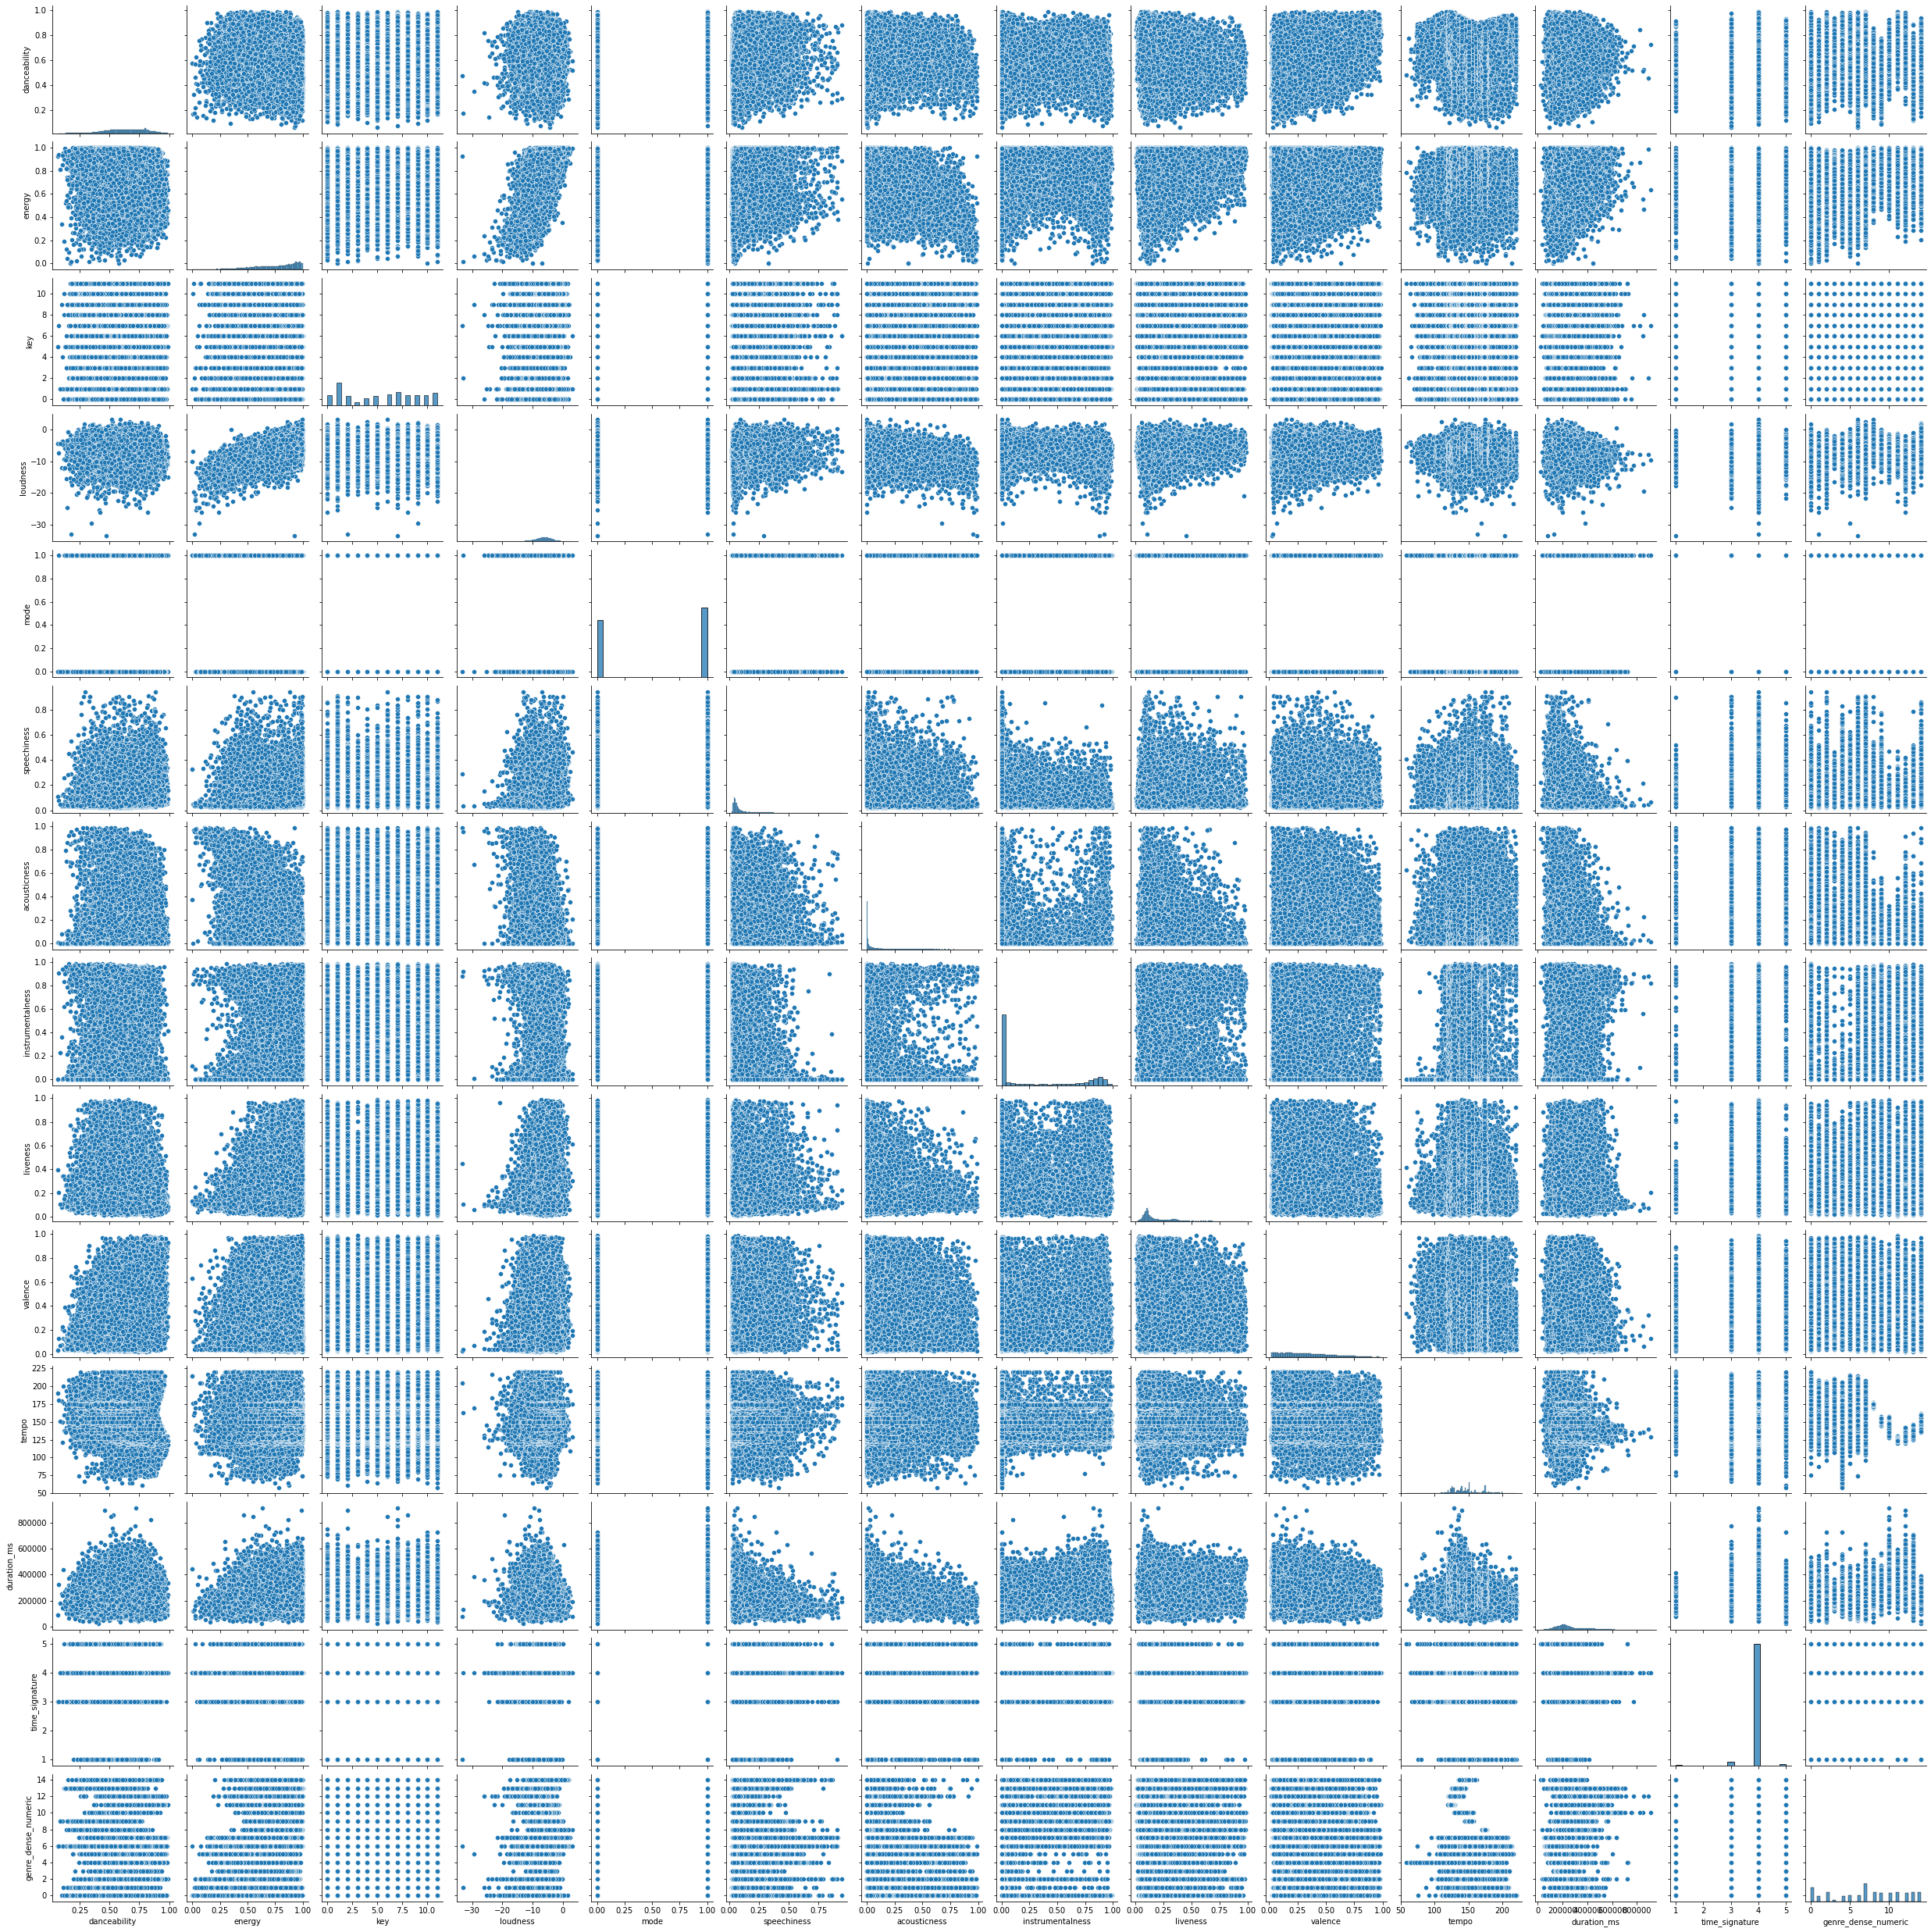

In [ ]:
sns.pairplot(df)

In [ ]:
df.iloc[:,13]

0        0
1        0
2        0
3        0
4        0
        ..
42300    9
42301    9
42302    9
42303    9
42304    9
Name: genre_dense_numeric, Length: 42305, dtype: int64

In [ ]:
df_data = df.to_numpy()
df_data[:,0:13]

array([[8.31000e-01, 8.14000e-01, 2.00000e+00, ..., 1.56985e+02,
        1.24539e+05, 4.00000e+00],
       [7.19000e-01, 4.93000e-01, 8.00000e+00, ..., 1.15080e+02,
        2.24427e+05, 4.00000e+00],
       [8.50000e-01, 8.93000e-01, 5.00000e+00, ..., 2.18050e+02,
        9.88210e+04, 4.00000e+00],
       ...,
       [3.61000e-01, 8.21000e-01, 8.00000e+00, ..., 1.54935e+02,
        2.34823e+05, 4.00000e+00],
       [4.77000e-01, 9.21000e-01, 6.00000e+00, ..., 1.50042e+02,
        3.23200e+05, 4.00000e+00],
       [5.29000e-01, 9.45000e-01, 9.00000e+00, ..., 1.55047e+02,
        1.62161e+05, 4.00000e+00]])

In [ ]:
scaler = StandardScaler()
df_data_normalized = scaler.fit_transform(df_data[:,0:13])
df_data_normalized

array([[ 1.22360786,  0.2800791 , -0.91929801, ...,  0.39887636,
        -1.22699247,  0.10218413],
       [ 0.50847965, -1.46618532,  0.71731784, ..., -1.35856366,
        -0.25679629,  0.10218413],
       [ 1.34492425,  0.70984511, -0.10099009, ...,  2.95986132,
        -1.4767873 ,  0.10218413],
       ...,
       [-1.77737659,  0.31815963,  0.71731784, ...,  0.31290208,
        -0.15582161,  0.10218413],
       [-1.03670809,  0.86216724,  0.17177922, ...,  0.10769616,
         0.70257007,  0.10218413],
       [-0.70468428,  0.99272907,  0.99008715, ...,  0.31759921,
        -0.861576  ,  0.10218413]])

In [ ]:
list(df.columns[0:-1])

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature']

In [ ]:
df_normalized = pd.DataFrame(df_data_normalized, columns = list(df.columns[0:-1]))
df_normalized

danceability    energy       key  loudness      mode  speechiness  \
0          1.223608  0.280079 -0.919298 -0.305514  0.905517     2.246552   
1          0.508480 -1.466185  0.717318 -0.259954  0.905517    -0.453057   
2          1.344924  0.709845 -0.100990  0.572039  0.905517    -0.588592   
3         -1.043093  0.100557 -1.464837  0.596860  0.905517    -0.266002   
4          1.012900 -0.753535 -0.919298 -0.408876  0.905517     1.239945   
...             ...       ...       ...       ...       ...          ...   
42300     -0.711069 -0.378170 -0.373759  0.447937  0.905517    -0.841432   
42301     -0.781305  0.029836 -1.464837 -0.495237 -1.104341    -0.702727   
42302     -1.777377  0.318160  0.717318  1.143588  0.905517    -0.682119   
42303     -1.036708  0.862167  0.171779  0.574079 -1.104341    -0.771683   
42304     -0.704684  0.992729  0.990087  0.205174  0.905517    -0.594933   

       acousticness  instrumentalness  liveness   valence     tempo  \
0         -0.212853         -0.727231 -0.902637  0.136790  0.398876   
1          1.784518         -0.763370 -0.547231 -0.999586 -1.358564   
2         -0.482135         -0.763359  0.899456 -1.363655  2.959861   
3         -0.424181         -0.763370 -0.570013 -0.780887  1.655485   
4          0.707390         -0.763370 -0.273841  1.003008  0.021554   
...             ...               ...       ...       ...       ...   
42300     -0.378520         -0.762440 -0.530144  0.158231  0.106480   
42301     -0.431205         -0.763321 -0.051712  0.111061  0.102915   
42302     -0.410717         -0.762718  0.973499 -0.999586  0.312902   
42303     -0.559694         -0.683540 -0.891815  0.561323  0.107696   
42304     -0.551855         -0.763223  1.138672 -0.956704  0.317599   

       duration_ms  time_signature  
0        -1.226992        0.102184  
1        -0.256796        0.102184  
2        -1.476787        0.102184  
3        -1.235520       -3.624453  
4        -1.239046        0.102184  
...            ...             ...  
42300     0.178154        0.102184  
42301    -0.395836        0.102184  
42302    -0.155822        0.102184  
42303     0.702570        0.102184  
42304    -0.861576        0.102184  

[42305 rows x 13 columns]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_normalized.iloc[:,0:13], df.iloc[:,13], train_size = 0.8, random_state=1)

In [ ]:
X_train

danceability    energy       key  loudness      mode  speechiness  \
11533      1.325769 -1.079940  0.171779 -0.977705 -1.104341    -0.553717   
24044      0.751112  1.134171  0.171779  0.286435  0.905517    -0.565606   
38369     -0.576983  0.013515  1.262856  0.351376  0.905517    -0.694801   
2516      -0.366275  0.193038  0.717318  0.420057 -1.104341    -0.848566   
40671     -1.004783  0.698965  0.171779  1.017106 -1.104341    -0.784365   
...             ...       ...       ...       ...       ...          ...   
7813      -0.953702  0.862167  0.171779  1.051447  0.905517     2.381294   
32511     -0.596138  0.862167 -1.192067  0.393536  0.905517    -0.766135   
5192      -0.085332 -0.867777 -0.100990 -0.877743 -1.104341     0.558306   
12172     -0.838771 -1.199622  1.535626 -0.774722 -1.104341    -0.273928   
33003     -0.193878  0.916568  0.171779  0.250054 -1.104341    -0.540243   

       acousticness  instrumentalness  liveness   valence     tempo  \
11533      0.326882          0.938417  0.711501  0.368353 -1.321574   
24044     -0.519717          1.208114 -0.416231  2.143673 -0.944629   
38369     -0.540206         -0.763360 -0.279537 -0.635088  1.107137   
2516      -0.548753         -0.710240 -0.663421 -0.965280 -0.731958   
40671     -0.558570         -0.763367  1.138672 -0.780887  0.103041   
...             ...               ...       ...       ...       ...   
7813       1.123021         -0.763370  1.525974  0.599917  0.127491   
32511     -0.561438          1.467023 -0.698164 -0.360643 -0.187552   
5192      -0.299491         -0.762755 -0.461796 -0.939551 -1.442525   
12172      0.461523         -0.762626 -0.564317 -0.815193 -0.735732   
33003     -0.558781          1.442750 -0.722656 -0.099062 -0.229281   

       duration_ms  time_signature  
11533    -1.279189        0.102184  
24044    -0.301349        0.102184  
38369     0.041825        0.102184  
2516     -0.177132        0.102184  
40671    -1.115499        0.102184  
...            ...             ...  
7813     -0.127557        0.102184  
32511     2.036143        0.102184  
5192      2.168791        0.102184  
12172    -1.089430        0.102184  
33003     1.798722        0.102184  

[33844 rows x 13 columns]

In [ ]:
X_test

danceability    energy       key  loudness      mode  speechiness  \
11440      1.357694 -1.390024  0.171779 -0.311975  0.905517     1.239945   
954        1.070366 -1.079940  0.171779 -0.500678 -1.104341     1.446022   
3830      -2.294568  1.009049  0.717318  0.769582  0.905517     0.058965   
19375     -0.455666 -1.237702 -0.373759 -0.965805  0.905517     2.983673   
39328     -0.857926  0.698965 -0.100990  1.169769 -1.104341     0.233338   
...             ...       ...       ...       ...       ...          ...   
41491     -1.885923  1.003609 -1.464837  1.289451 -1.104341    -0.643282   
29667     -0.723839  1.025370  1.535626 -0.360595 -1.104341    -0.701142   
30536     -0.257729  1.215772  0.990087  0.387076  0.905517    -0.642489   
12126     -0.883466 -0.824256  0.717318  0.920885  0.905517     1.929510   
35135      0.361623  0.454162 -0.373759  1.754578  0.905517     0.804013   

       acousticness  instrumentalness  liveness   valence     tempo  \
11440      0.438107         -0.744950 -0.709556  0.175384  2.202533   
954        0.397130         -0.763370 -0.761386 -0.566477  1.867694   
3830      -0.525278          1.688174 -0.547231 -1.380379  0.534296   
19375      0.707390         -0.763370 -0.570013 -0.133367  0.826357   
39328     -0.540206          1.164962 -0.478883 -0.377795  1.113805   
...             ...               ...       ...       ...       ...   
41491     -0.223975         -0.762572 -0.188407 -1.063909  0.112435   
29667     -0.559032          1.496689 -0.581404  1.084484 -0.816506   
30536     -0.562441          1.639628  0.967804 -0.231996 -0.312068   
12126     -0.560917         -0.763298  0.198895 -0.738005 -0.321840   
35135     -0.293052         -0.734513 -0.216885  0.604205  0.108283   

       duration_ms  time_signature  
11440    -0.944728        0.102184  
954      -0.875465        0.102184  
3830     -1.358524        0.102184  
19375    -0.808233        0.102184  
39328     0.876469        0.102184  
...            ...             ...  
41491    -0.179997        0.102184  
29667    -0.105538       -3.624453  
30536     1.931079        0.102184  
12126    -1.179642        0.102184  
35135    -0.501822        0.102184  

[8461 rows x 13 columns]

In [ ]:
y_train

11533     6
24044    11
38369     8
2516      0
40671     9
         ..
7813      7
32511    10
5192      7
12172     6
33003    10
Name: genre_dense_numeric, Length: 33844, dtype: int64

In [ ]:
y_test

11440     6
954       0
3830      0
19375     2
39328     8
         ..
41491     9
29667    13
30536    10
12126     6
35135    14
Name: genre_dense_numeric, Length: 8461, dtype: int64

In [ ]:
df['genre_dense_numeric'].nunique()

15

In [ ]:
def build_model(n_classes, learning_rate = 0.01):
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(
      units=n_classes,
      activation='softmax'
  ))

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model.compile(loss="sparse_categorical_crossentropy",
                optimizer = optimizer,
                metrics=['accuracy'])
  return model

In [ ]:
model = build_model(df['genre_dense_numeric'].nunique(), 0.01)
history = model.fit(
    x = X_train,
    y = y_train,
    epochs = 5,
    batch_size = 64, 
    validation_split=0.1,
    verbose =1)

history = pd.DataFrame(history.history)
display(history)

Epoch 1/5
476/476 [==============================] - 1s 1ms/step - loss: 1.5097 - accuracy: 0.5169 - val_loss: 1.3181 - val_accuracy: 0.5716
Epoch 2/5
476/476 [==============================] - 1s 1ms/step - loss: 1.3022 - accuracy: 0.5691 - val_loss: 1.2871 - val_accuracy: 0.5790
Epoch 3/5
476/476 [==============================] - 1s 1ms/step - loss: 1.2845 - accuracy: 0.5710 - val_loss: 1.2739 - val_accuracy: 0.5876
Epoch 4/5
476/476 [==============================] - 1s 1ms/step - loss: 1.2778 - accuracy: 0.5751 - val_loss: 1.2744 - val_accuracy: 0.5873
Epoch 5/5
476/476 [==============================] - 1s 1ms/step - loss: 1.2745 - accuracy: 0.5755 - val_loss: 1.2685 - val_accuracy: 0.5855


loss  accuracy  val_loss  val_accuracy
0  1.509690  0.516859  1.318117      0.571640
1  1.302157  0.569093  1.287128      0.579025
2  1.284491  0.570997  1.273888      0.587592
3  1.277831  0.575101  1.274400      0.587297
4  1.274535  0.575462  1.268482      0.585524

In [ ]:
test_predictions = np.argmax(model.predict(X_test), axis = -1)

265/265 [==============================] - 0s 719us/step


In [ ]:
set(list(test_predictions))

{0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}

In [ ]:
label_names

['Dark Trap',
 'Emo',
 'Hiphop',
 'Pop',
 'Rap',
 'RnB',
 'Trap Metal',
 'Underground Rap',
 'dnb',
 'hardstyle',
 'psytrance',
 'techhouse',
 'techno',
 'trance',
 'trap']

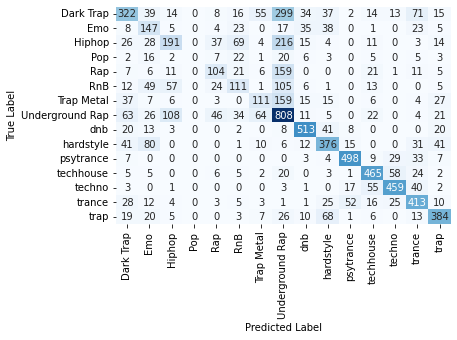

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test, test_predictions)

ax = sns.heatmap(confusion_matrix, annot = True, fmt = '.3g', cmap = 'Blues', xticklabels = label_names, yticklabels = label_names, cbar = False)

ax.set(xlabel = 'Predicted Label', ylabel = 'True Label')

plt.show()

In [ ]:
accuracy_score(y_test, test_predictions)

0.5793641413544498

**Neural Network**

---



In [ ]:
def build_NN_model (n_classes,
                    hidden_layer_sizes=[],
                    activation = 'relu',
                    optimizer = 'SGD',
                    learning_rate = 0.01):
  
  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model = keras.Sequential()
  model.add(keras.layers.Flatten())
  for hidden_layer_size in hidden_layer_sizes:
    model.add(tf.keras.layers.Dense(units=hidden_layer_size,
                                    activation=activation))
  model.add(tf.keras.layers.Dense(units=n_classes, activation='softmax', name='output'))
  if optimizer.upper() == 'SGD':
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
  elif optimizer.upper() == 'ADAM':
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss = 'sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

In [ ]:
def train_and_evaluate (hidden_layer_sizes = [],
                        activation = 'tanh',
                        optimizer = 'Adam',
                        learning_rate = 0.01,
                        num_epochs=5):
  model = build_NN_model(n_classes = df['genre_dense_numeric'].nunique(),
                    hidden_layer_sizes=hidden_layer_sizes,
                    activation = activation,
                    optimizer = optimizer,
                    learning_rate = learning_rate)
  # print('Training...')
  history = model.fit(
      x = X_train,
      y = y_train,
      epochs = num_epochs,
      batch_size = 64,
      validation_split = 0.1,
      verbose = 0)
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  plt.plot(train_accuracy, label='train_accuracy')
  plt.plot(val_accuracy, label='validation_accuracy')
  plt.xticks(range(0,num_epochs,5))
  plt.xlabel('Train_epochs')
  plt.legend()
  plt.show()

  test_accuracy = model.evaluate(x = X_test, y = y_test, verbose = 0, return_dict=True)['accuracy']
  print('Test Accuracy:')
  return test_accuracy

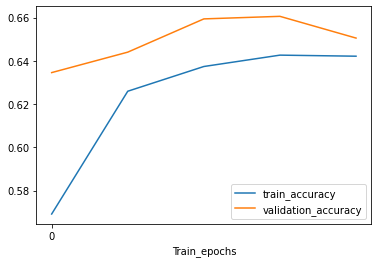

Test Accuracy:


0.6472048163414001

In [ ]:
train_and_evaluate(hidden_layer_sizes = [32], activation = 'tanh', optimizer = 'Adam', learning_rate = 0.01, num_epochs=5)

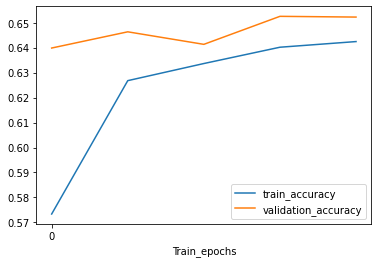

Test Accuracy:


0.6444864869117737

In [ ]:
train_and_evaluate(hidden_layer_sizes = [32], activation = 'relu', optimizer = 'Adam', learning_rate = 0.01, num_epochs=5)

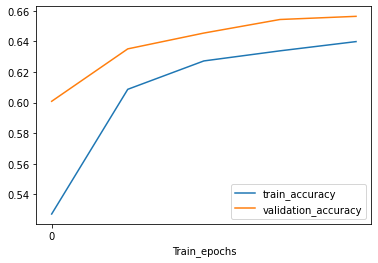

Test Accuracy:


0.6448410153388977

In [ ]:
train_and_evaluate(hidden_layer_sizes = [32], activation = 'sigmoid', optimizer = 'Adam', learning_rate = 0.01, num_epochs=5)

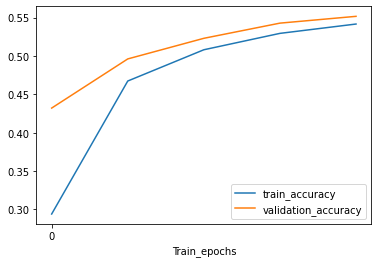

Test Accuracy:


0.549934983253479

In [ ]:
train_and_evaluate(hidden_layer_sizes = [32], activation = 'tanh', optimizer = 'SGD', learning_rate = 0.01, num_epochs=5)

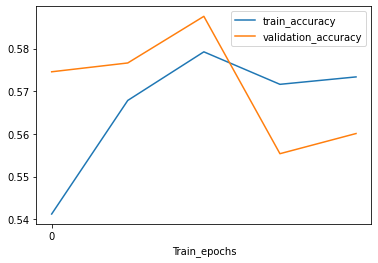

Test Accuracy:


0.5651814341545105

In [ ]:
train_and_evaluate(hidden_layer_sizes = [32], activation = 'tanh', optimizer = 'Adam', learning_rate = 0.1, num_epochs=5)

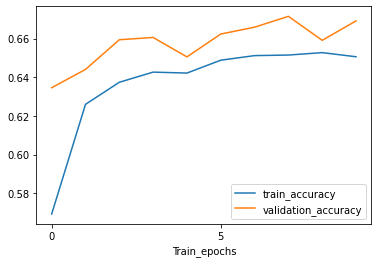

Test Accuracy:


0.65985107421875

In [ ]:
train_and_evaluate(hidden_layer_sizes = [32], activation = 'tanh', optimizer = 'Adam', learning_rate = 0.01, num_epochs=10)

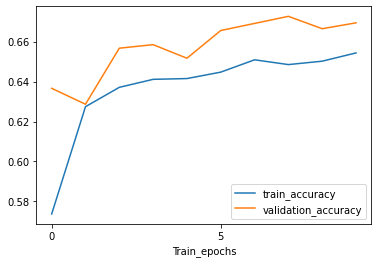

Test Accuracy:


0.6594964861869812

In [ ]:
# this one is chosen, when num_epochs increase from 10 to 100, the test_accuracy increase 0.0001. 
train_and_evaluate(hidden_layer_sizes = [32, 16], activation = 'tanh', optimizer = 'Adam', learning_rate = 0.01, num_epochs=10)

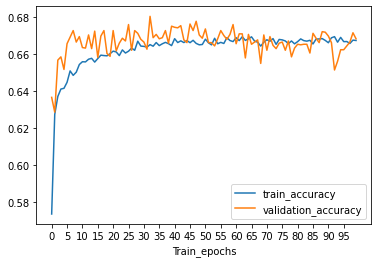

Test Accuracy:


0.6596146821975708

In [ ]:
train_and_evaluate(hidden_layer_sizes = [32, 16], activation = 'tanh', optimizer = 'Adam', learning_rate = 0.01, num_epochs=100)

In [ ]:
# hyperparameter tuning
!pip install keras-tuner
import kerastuner as kt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 31.5 MB/s 
     |████████████████████████████████| 1.6 MB 59.2 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
def build_HP_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten())

  for i in range(1,hp.Int("num_layers", 2,6)):
    model.add(keras.layers.Dense(units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
                                 activation='tanh'))
    
    model.add(keras.layers.Dense(units=df['genre_dense_numeric'].nunique(), activation="softmax"))

    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=["accuracy"])
    return model

In [ ]:
tuner = kt.Hyperband(build_HP_model,
                     objective="val_accuracy",
                     max_epochs=20,
                     factor=3,
                     hyperband_iterations=10,
                     directory="kt_dir",
                     project_name="kt_hyperband",)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 6, 'step': 1, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
NUM_EPOCHS = 10,
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train, epochs=NUM_EPOCHS, validation_split=0.1, callbacks=[stop_early], verbose=2)

Trial 290 Complete [00h 00m 11s]
val_accuracy: 0.6531757712364197

Best val_accuracy So Far: 0.6791728138923645
Total elapsed time: 00h 55m 56s


In [ ]:
NUM_EPOCHS = 10

best_hps=tuner.get_best_hyperparameters()[0]

h_model=tuner.hypermodel.build(best_hps)

h_model.fit(X_train, y_train, epochs=NUM_EPOCHS, validation_split=0.1, callbacks=[stop_early], verbose=2)

Epoch 1/10
952/952 - 2s - loss: 1.2541 - accuracy: 0.5675 - val_loss: 1.0768 - val_accuracy: 0.6257 - 2s/epoch - 2ms/step
Epoch 2/10
952/952 - 2s - loss: 1.0747 - accuracy: 0.6189 - val_loss: 1.0240 - val_accuracy: 0.6434 - 2s/epoch - 2ms/step
Epoch 3/10
952/952 - 3s - loss: 1.0352 - accuracy: 0.6312 - val_loss: 1.0037 - val_accuracy: 0.6544 - 3s/epoch - 3ms/step
Epoch 4/10
952/952 - 3s - loss: 1.0125 - accuracy: 0.6379 - val_loss: 1.0099 - val_accuracy: 0.6484 - 3s/epoch - 3ms/step
Epoch 5/10
952/952 - 2s - loss: 1.0028 - accuracy: 0.6371 - val_loss: 0.9842 - val_accuracy: 0.6526 - 2s/epoch - 2ms/step
Epoch 6/10
952/952 - 2s - loss: 0.9934 - accuracy: 0.6420 - val_loss: 1.0273 - val_accuracy: 0.6467 - 2s/epoch - 2ms/step
Epoch 7/10
952/952 - 2s - loss: 0.9865 - accuracy: 0.6465 - val_loss: 0.9829 - val_accuracy: 0.6576 - 2s/epoch - 2ms/step
Epoch 8/10
952/952 - 2s - loss: 0.9800 - accuracy: 0.6485 - val_loss: 0.9824 - val_accuracy: 0.6567 - 2s/epoch - 2ms/step
Epoch 9/10
952/952 - 2s 

In [ ]:
best_hps.values

{'num_layers': 6,
 'units_1': 128,
 'learning_rate': 0.01,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0230'}

In [ ]:
h_model.predict(X_test)

265/265 [==============================] - 1s 2ms/step


array([[1.40234604e-01, 9.74359643e-03, 1.42061308e-01, ...,
        1.19731055e-07, 3.81674568e-08, 7.74438649e-06],
       [1.69958428e-01, 5.24224900e-03, 1.26012295e-01, ...,
        2.22134034e-07, 1.34036227e-07, 6.17212936e-06],
       [5.18900156e-01, 1.08892540e-03, 2.19792943e-04, ...,
        7.50998879e-07, 4.27905470e-05, 5.06565012e-02],
       ...,
       [1.09756875e-04, 2.48617141e-07, 1.92017274e-06, ...,
        9.59075149e-03, 4.71884497e-02, 7.25515056e-05],
       [2.05436841e-01, 1.04328478e-03, 1.05356174e-02, ...,
        1.09279839e-07, 1.48204679e-03, 1.01384856e-01],
       [2.29369886e-02, 6.00586995e-04, 9.28507838e-03, ...,
        2.53722127e-10, 1.01030061e-07, 8.84291708e-01]], dtype=float32)

In [ ]:
  test_accuracy = h_model.evaluate(x = X_test, y = y_test, verbose = 0, return_dict=True)['accuracy']
  print('Test Accuracy:', test_accuracy)

Test Accuracy: 0.6482685208320618


**Random Forest**

---



In [ ]:
label_names

['Dark Trap',
 'Emo',
 'Hiphop',
 'Pop',
 'Rap',
 'RnB',
 'Trap Metal',
 'Underground Rap',
 'dnb',
 'hardstyle',
 'psytrance',
 'techhouse',
 'techno',
 'trance',
 'trap']

In [ ]:
classifier = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state=1)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=1)

In [ ]:
y_pred_RF = classifier.predict(X_test)

In [ ]:
y_pred_RF

array([ 7,  7, 14, ..., 10,  6, 14])

In [ ]:
accuracy_score(y_test, y_pred_RF)

0.6384588110152464

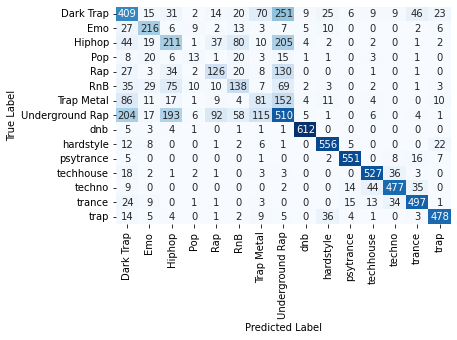

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_RF)

ax = sns.heatmap(confusion_matrix, annot = True, fmt = '.3g', cmap = 'Blues', xticklabels = label_names, yticklabels = label_names, cbar = False)

ax.set(xlabel = 'Predicted Label', ylabel = 'True Label')

plt.show()

In [ ]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
param_grid = {'n_estimators': [100, 500, 1000],
              'criterion': ['gini', 'entropy']}
grid = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, refit = True, verbose = 3, n_jobs = -1, cv = 5, scoring = 'accuracy')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 500, 1000]},
             scoring='accuracy', verbose=3)

In [ ]:
grid.best_estimator_

RandomForestClassifier(n_estimators=500, random_state=1)

In [ ]:
y_pred_bestRF = grid.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred_bestRF)

0.6743883701690108

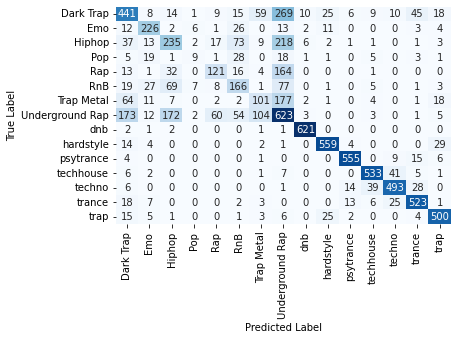

In [ ]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_bestRF)

ax = sns.heatmap(confusion_matrix, annot = True, fmt = '.3g', cmap = 'Blues', xticklabels = label_names, yticklabels = label_names, cbar = False)

ax.set(xlabel = 'Predicted Label', ylabel = 'True Label')

plt.show()

Gradient Boosting

---



In [ ]:
clf = GradientBoostingClassifier().fit(X_train, y_train)
clf.score(X_test, y_test)

0.6898711736201395

In [ ]:
clf.predict(X_test)

array([ 7,  7,  6, ..., 10,  6, 14])

In [ ]:
param_grid = {'learning_rate': [0.01, 0.1, 0.5],
              'n_estimators': [100, 200, 300],
              'subsample': [0.8, 0.9, 1],
              'max_depth': [3, 5, 7]}
grid = RandomizedSearchCV(GradientBoostingClassifier(random_state=1), param_grid, n_iter=10, refit = True, verbose = 3, n_jobs = -1, cv = 5, scoring = 'accuracy')
# grid = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, refit = True, verbose = 3, n_jobs = -1, cv = 5, scoring = 'accuracy')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
grid.best_estimator_

In [ ]:
y_pred_GB = grid.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_GB)

KNN

In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
neigh.predict(X_test)
neigh.score(X_test,y_test)

In [ ]:
accuracy_score(y_test, neigh.predict(X_test))

In [ ]:
param_grid = {'n_neighbors': [1,5,10],
              'weights': ['uniform', 'distance'],
              'p': [1,2]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3, n_jobs = -1, cv = 5, scoring = 'accuracy')
grid.fit(X_train, y_train)

In [ ]:
grid.best_estimator_

In [ ]:
y_pred_KNN = grid.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_KNN)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=10, p=1, weights = 'distance')
neigh.fit(X_train, y_train)
neigh.score(X_test,y_test)

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=10, p=1, weights = 'uniform')
neigh.fit(X_train, y_train)
neigh.score(X_test,y_test)

Kmeans

In [ ]:
n_clusters=df['genre_dense_numeric'].nunique()
random_state = 10

In [ ]:
def fit_kmeans(X, n_clusters, random_state):
  kmeans = KMeans(n_clusters, random_state=random_state)
  model = kmeans.fit(X)
  return model

In [ ]:
K_model = fit_kmeans(X_train, n_clusters, random_state)

In [ ]:
y_pred_KMeans = K_model.predict(X_test)
y_pred_KMeans

In [ ]:
pd.DataFrame(y_test)

In [ ]:
pd.crosstab(y_pred_KMeans, y_test)

In [ ]:
genre_dict = {
    0: 2,
    1: 12,
    2: 11,
    3: 10,
    4: 6,
    5: 8,
    6: 1,
    7: 14,
    8: 7,
    9:  5,
    10: 6,
    11: 0,
    12: 9,
    13: 13,
    14: 4
}

In [ ]:
len(y_pred_KMeans)

In [ ]:
df_y_pred_KMeans = pd.DataFrame({'y_pred': y_pred_KMeans})
df_y_pred_KMeans['y_pred'] = df_y_pred_KMeans['y_pred'].map(genre_dict)

In [ ]:
accuracy_score(y_test, df_y_pred_KMeans['y_pred'])